# Structure functions with 1D data

This example will guide you through calculating structure functions with 1D velocity data. 

**General procedure**:
1. Generate a random 1D velocity field
2. Calculate different types of structure functions
3. Plot the structure functions as a function of separation distance

In [1]:
import matplotlib_inline.backend_inline
import numpy as np
import seaborn as sns

sns.set_style(style="white")
sns.set_context("talk")

matplotlib_inline.backend_inline.set_matplotlib_formats("png", dpi=200)

## Create a random 1D velocity field

In [2]:
nx = 100
x = np.linspace(0, 1, nx)
U = np.random.rand(nx)
V = np.random.rand(nx)
S = np.random.rand(nx)

## Calculate various velocity-based structure functions
We will calculate two different structure functions at the same time with this step. You can choose different structure functions by changing the argument `traditional_type`. Accepted strings are `LL`, `LLL`, `LTT`, and `LSS`.

In [3]:
import fluidsf

sf = fluidsf.generate_structure_functions_1d(u=U, x=x, 
                                             traditional_type=["LL", "LLL"], 
                                             boundary=None)

Check which keys have data in the `sf` dictionary. Other keys are available but have been initialized to `None`.

In [4]:
for key in sf.keys():
    if sf[key] is not None:
        print(key)

SF_LL
SF_LLL
x-diffs


**Note**: if you include `LTT` and/or `LSS` you must provide arguments for `v` and `scalar`, respectively. Otherwise FluidSF will raise an error. 

In [5]:
bad_sf = fluidsf.generate_structure_functions_1d(u=U, x=x, 
                                             traditional_type=["LL", "LLL", "LTT"], 
                                             boundary=None)

ValueError: If you include 'LTT' in traditional_type, you must provide a v array.

Now let's calculate all the possible structure functions.

In [6]:
sf_all = fluidsf.generate_structure_functions_1d(u=U, v=V, scalar=S, x=x,
                                                 traditional_type=[
                                                     "LL", "LLL", "LTT", "LSS"
                                                     ],
                                                 boundary=None)

In [7]:
for key in sf_all.keys():
    if sf_all[key] is not None:
        print(key)

SF_LL
SF_LLL
SF_LTT
SF_LSS
x-diffs


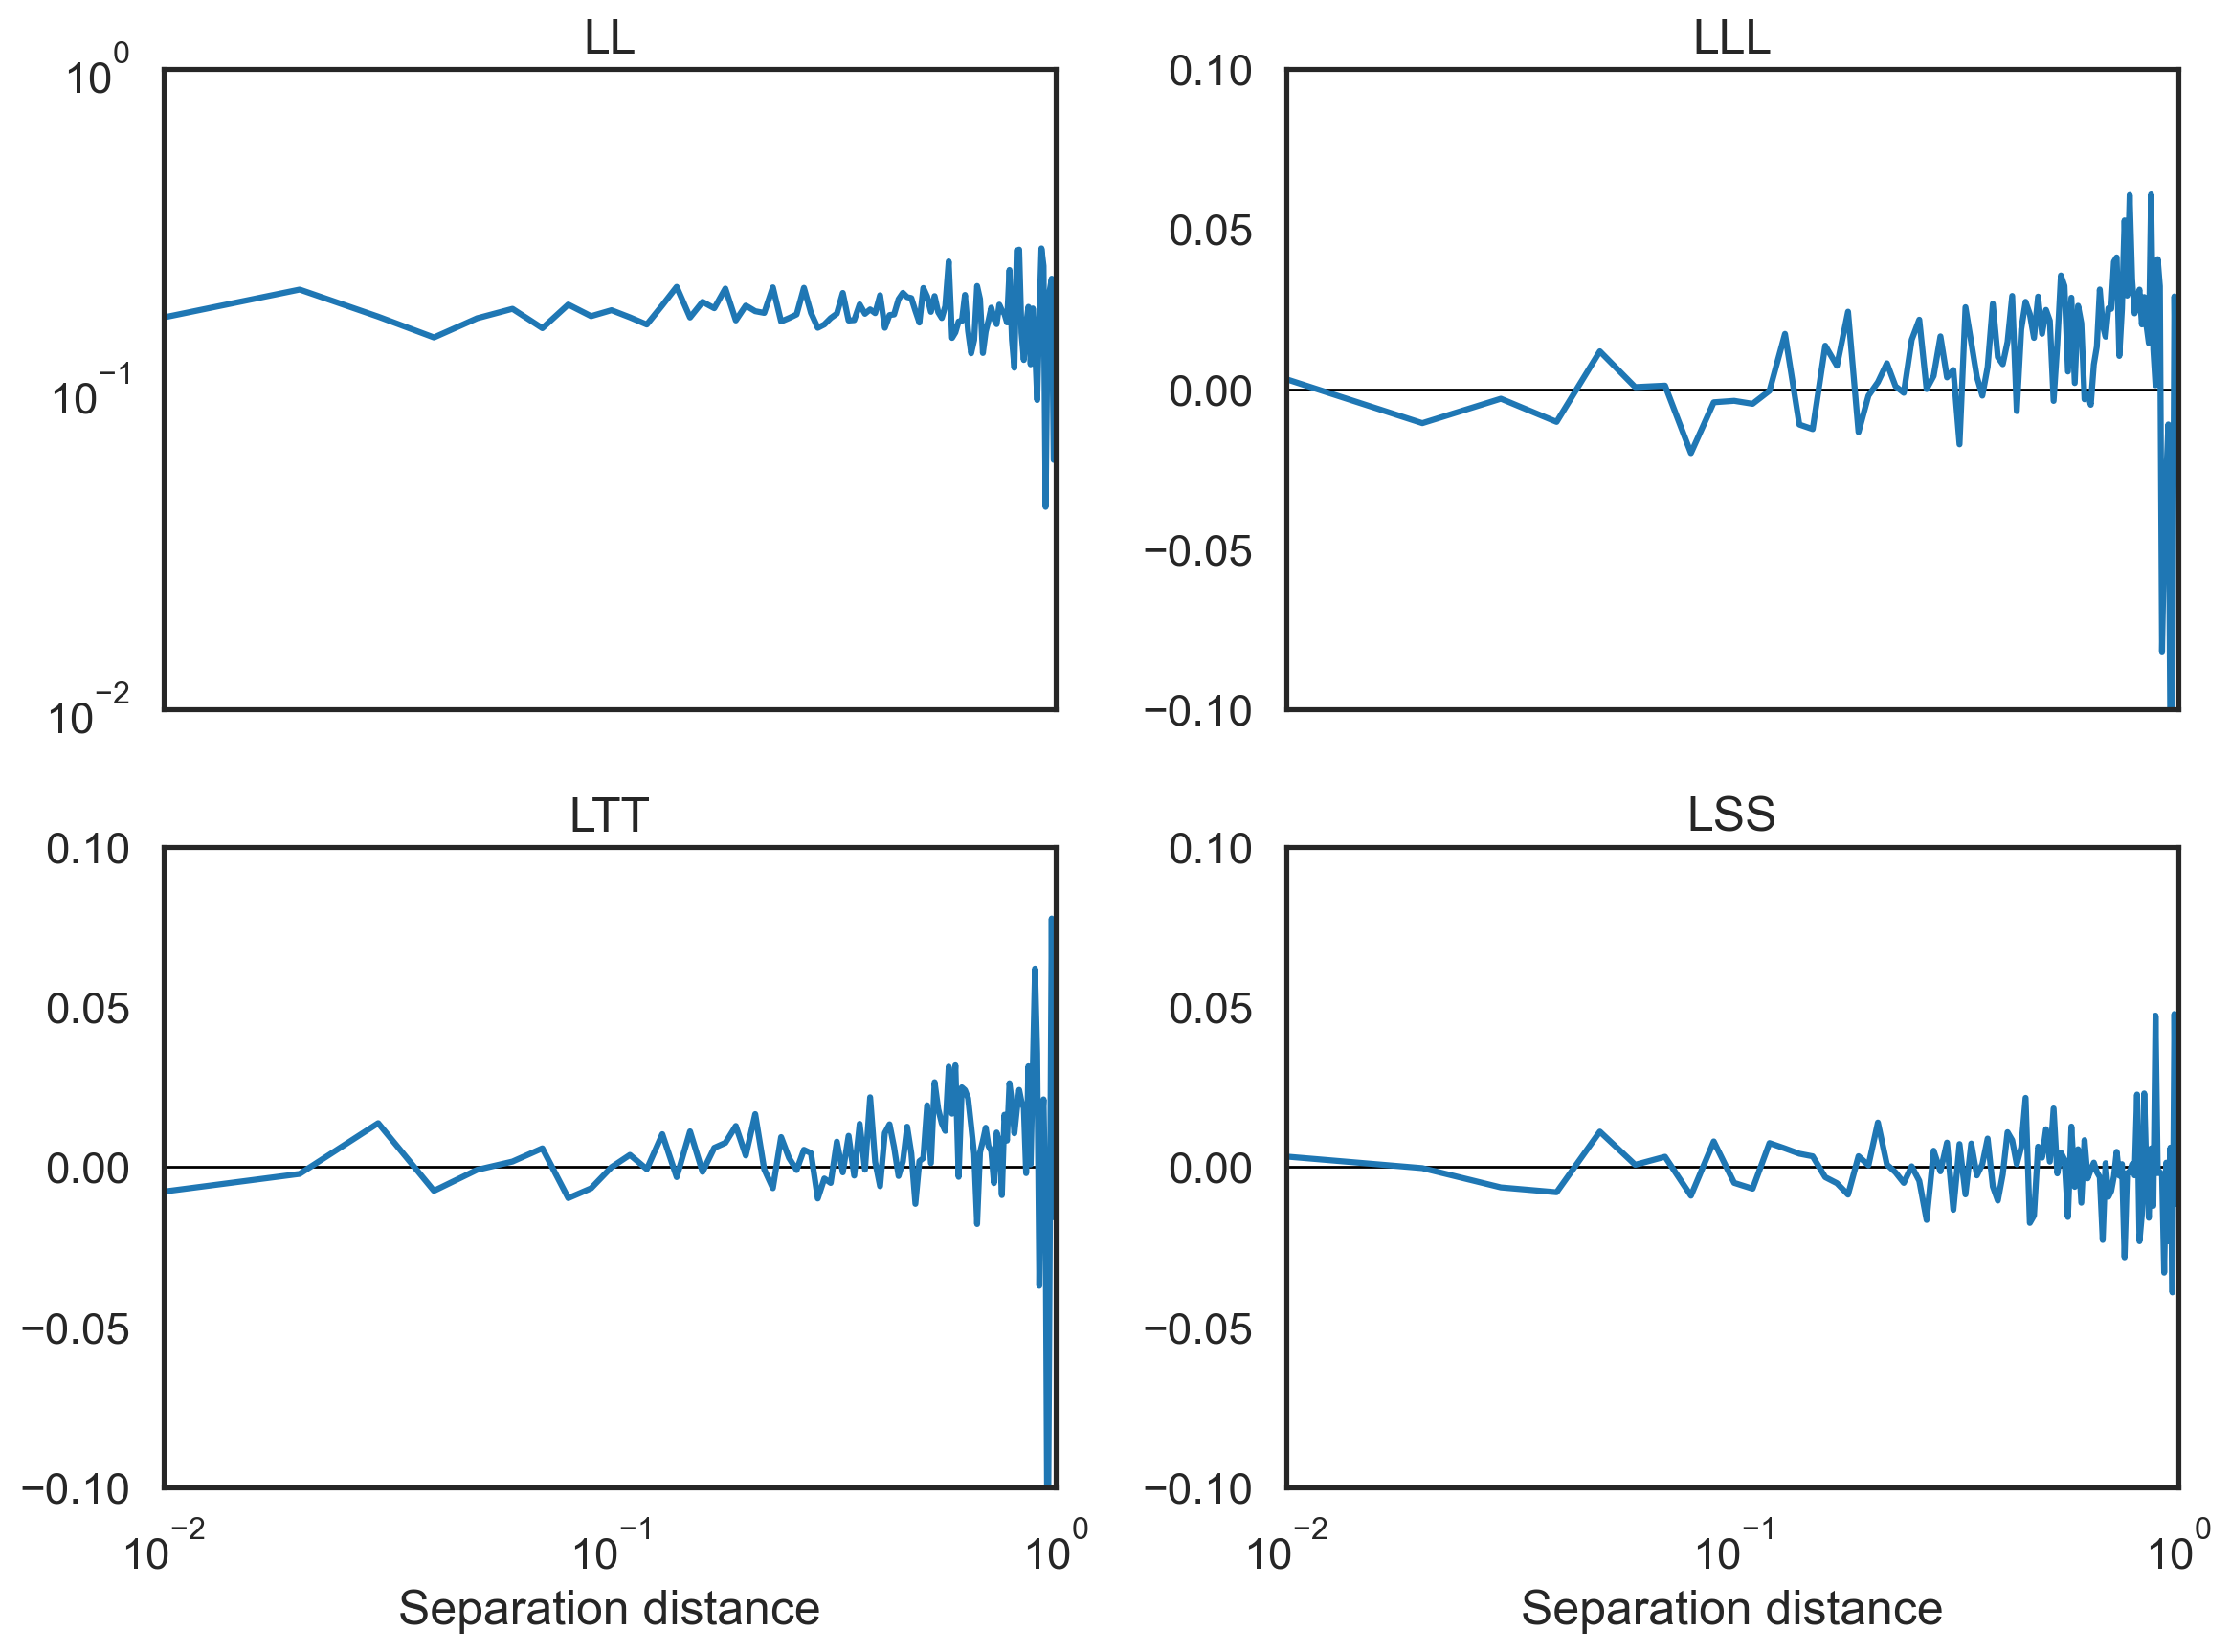

In [8]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(2, 2, figsize=(12,9), sharex=True)

ax[0, 0].loglog(sf_all["x-diffs"], sf_all["SF_LL"])
ax[0, 0].set_title("LL")
ax[0, 0].set_xticklabels([])
ax[0, 0].set_ylim(1e-2, 1e0)
ax[0, 0].set_xlim(1e-2, 1)

ax[0, 1].semilogx(sf_all["x-diffs"], sf_all["SF_LLL"])
ax[0, 1].set_title("LLL")
ax[0, 1].set_xticklabels([])
ax[0, 1].hlines(0, 0, 1, color="k", lw=1, zorder=0)
ax[0, 1].set_ylim(-1e-1, 1e-1)

ax[1, 0].semilogx(sf_all["x-diffs"], sf_all["SF_LTT"])
ax[1, 0].set_title("LTT")
ax[1, 0].set_xlabel("Separation distance")
ax[1, 0].hlines(0, 0, 1, color="k", lw=1, zorder=0)
ax[1, 0].set_ylim(-1e-1, 1e-1)

ax[1, 1].semilogx(sf_all["x-diffs"], sf_all["SF_LSS"])
ax[1, 1].set_title("LSS")
ax[1, 1].set_xlabel("Separation distance")
ax[1, 1].hlines(0, 0, 1, color="k", lw=1, zorder=0)
ax[1, 1].set_ylim(-1e-1, 1e-1)

plt.tight_layout()